### Data

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

Below are the availble source files
- application_{train|test}.csv : This is the main table, broken into two files for Train (with TARGET) and Test (without TARGET). Static data for all applications. One row represents one loan in our data sample.

- bureau.csv : All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample).For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.
- bureau_balance.csv: Monthly balances of previous credits in Credit Bureau.This table has one row for each month of history of every previous credit reported to Credit Bureau – i.e the table has (#loans in sample * # of relative previous credits * # of months where we have some history observable for the previous credits) rows.
- POS_CASH_balance.csv: Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit. This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credits * # of months in which we have some history observable for the previous credits) rows.
- credit_card_balance.csv:Monthly balance snapshots of previous credit cards that the applicant has with Home Credit. This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credit cards * # of months where we have some history observable for the previous credit card) rows.
- previous_application.csv: All previous applications for Home Credit loans of clients who have loans in our sample.There is one row for each previous application related to loans in our data sample.
- installments_payments.csv:Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample.There is a) one row for every payment that was made plus b) one row each for missed payment.One row is equivalent to one payment of one installment OR one installment corresponding to one payment of one previous Home Credit credit related to loans in our sample.
- HomeCredit_columns_description.csv This file contains descriptions for the columns in the various data files.

In [38]:
import  os 
import pandas as pd
import matplotlib.pyplot as pl
import math as mt
import matplotlib.patches as mpatches
import numpy as np
%matplotlib inline


In [3]:
print(os.listdir("../../data/homecredit/"))
path = "../../data/homecredit/"

['all.zip', 'application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'HomeCredit_columns_description.csv', 'home_credit.png', 'installments_payments.csv', 'POS_CASH_balance.csv', 'previous_application.csv', 'sample_submission.csv']


**Reading the Data**

In [4]:
app_train = pd.read_csv(path+"application_train.csv")
app_test = pd.read_csv(path+"application_test.csv")
bur = pd.read_csv(path+"bureau.csv")
bur_bal = pd.read_csv(path+"bureau_balance.csv")
cre_bal = pd.read_csv(path+"credit_card_balance.csv")
inst_pay = pd.read_csv(path+"installments_payments.csv")
pos_cash = pd.read_csv(path+"POS_CASH_balance.csv")
prev_app = pd.read_csv(path+"previous_application.csv")

**Check dimensions and data types**

In [5]:
print("Shape of Application Train set:",app_train.shape)
print("Shape of Application Test set:",app_test.shape)

Shape of Application Train set: (307511, 122)
Shape of Application Test set: (48744, 121)


**Listing and analysis of string and categorical columns**

In [6]:
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [7]:
print("Number of string columns:", app_train.dtypes[app_train.dtypes ==  object].shape)
app_train.dtypes[app_train.dtypes ==  object]

Number of string columns: (16,)


NAME_CONTRACT_TYPE            object
CODE_GENDER                   object
FLAG_OWN_CAR                  object
FLAG_OWN_REALTY               object
NAME_TYPE_SUITE               object
NAME_INCOME_TYPE              object
NAME_EDUCATION_TYPE           object
NAME_FAMILY_STATUS            object
NAME_HOUSING_TYPE             object
OCCUPATION_TYPE               object
WEEKDAY_APPR_PROCESS_START    object
ORGANIZATION_TYPE             object
FONDKAPREMONT_MODE            object
HOUSETYPE_MODE                object
WALLSMATERIAL_MODE            object
EMERGENCYSTATE_MODE           object
dtype: object

In [8]:
def get_unique_values(df):
    for col in df.columns:
        if(df[col].dtypes == 'object'):
            print(col," unique values:\t", df[col].unique())
        elif(df[col].unique().size <15):
            print(col," unique values:\t", df[col].unique())
get_unique_values(app_train)
get_unique_values(app_test)

TARGET  unique values:	 [1 0]
NAME_CONTRACT_TYPE  unique values:	 ['Cash loans' 'Revolving loans']
CODE_GENDER  unique values:	 ['M' 'F' 'XNA']
FLAG_OWN_CAR  unique values:	 ['N' 'Y']
FLAG_OWN_REALTY  unique values:	 ['Y' 'N']
NAME_TYPE_SUITE  unique values:	 ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']
NAME_INCOME_TYPE  unique values:	 ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
NAME_EDUCATION_TYPE  unique values:	 ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
NAME_FAMILY_STATUS  unique values:	 ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']
NAME_HOUSING_TYPE  unique values:	 ['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']
FLAG_MOBIL  unique values:	 [1 0]
FLAG_EMP_PHONE  unique values:	 [1 0]

In [9]:
#app_train.HOUSETYPE_MODE.unique().size
#app_train.AMT_INCOME_TOTAL.dtypes == 'object'
#app_train.HOUSETYPE_MODE.dtypes == 'object'

**Listing and Analysing all the integer and float columns**

In [10]:
print("Number of integer columns:", app_train.dtypes[app_train.dtypes == 'int64'].shape)

Number of integer columns: (41,)


In [11]:
print("Number of float columns:", app_train.dtypes[app_train.dtypes == 'float64'].shape)

Number of float columns: (65,)


In [13]:
app_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


**Check for NAs**

In [21]:
def missing_value_check(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns['Missing Values'] != 0]
    mis_val_table_ren_columns = mis_val_table_ren_columns.sort_values(by=['Missing Values'], ascending=False)
    return mis_val_table_ren_columns.round(1)
        
#app_train.apply(lambda x: sum(x.isnull()))
missing_values = missing_value_check(app_train)
missing_values.head(30)

,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


**Visualize distributions**

C:\Users\ragha\Anaconda3\lib\site-packages\numpy\core\_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
C:\Users\ragha\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


ValueError: max must be larger than min in range parameter.

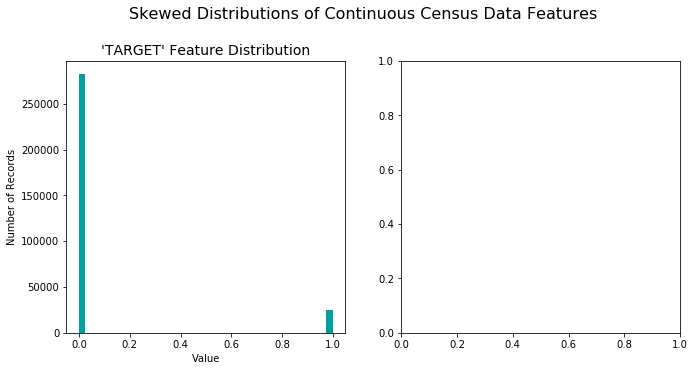

In [46]:
def distribution(data,feature_list):
    cnt = len(feature_list)
    #row = mt.ceil(cnt/4)
    # Create figure
    fig = pl.figure(figsize = (11,5));
    for i, feature in enumerate(feature_list):
        ax = fig.add_subplot(1, 2, i+1)
        ax.hist(data[feature], bins = 40, color = '#00A0A0')
        ax.set_title("'%s' Feature Distribution"%(feature), fontsize = 14)
        ax.set_xlabel("Value")
        ax.set_ylabel("Number of Records")
        #ax.set_xlim((0, 5))
        #ax.set_xticks([0, 1, 2, 3, 4, 5])
        #ax.set_xticklabels([0, 1, 2, 3, 4, ">5"])
    
       # Plot aesthetics
    #if transformed:
        #fig.suptitle("Log-transformed Distributions of Continuous Census Data Features", \
           # fontsize = 16, y = 1.03)
    #else:
        fig.suptitle("Skewed Distributions of Continuous Census Data Features", fontsize = 16, y = 1.03)

    fig.tight_layout()
    fig.show()
distribution(app_train,['TARGET','AMT_REQ_CREDIT_BUREAU_HOUR'])

In [30]:
inst_pay.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [9]:
bur.head(10)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.00,0.00,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.00,171342.00,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.50,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.00,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.00,NaN,NaN,0.0,Consumer credit,-21,NaN
5,215354,5714467,Active,currency 1,-273,0,27460.0,NaN,0.0,0,180000.00,71017.38,108982.62,0.0,Credit card,-31,NaN
6,215354,5714468,Active,currency 1,-43,0,79.0,NaN,0.0,0,42103.80,42103.80,0.00,0.0,Consumer credit,-22,NaN
7,162297,5714469,Closed,currency 1,-1896,0,-1684.0,-1710.0,14985.0,0,76878.45,0.00,0.00,0.0,Consumer credit,-1710,NaN
8,162297,5714470,Closed,currency 1,-1146,0,-811.0,-840.0,0.0,0,103007.70,0.00,0.00,0.0,Consumer credit,-840,NaN
9,162297,5714471,Active,currency 1,-1146,0,-484.0,NaN,0.0,0,4500.00,0.00,0.00,0.0,Credit card,-690,NaN


In [11]:
bur_bal.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [14]:
bur_bal.STATUS.value_counts()

C    13646993
0     7499507
X     5810482
1      242347
5       62406
2       23419
3        8924
4        5847
Name: STATUS, dtype: int64